In [1]:
import numpy as np
from mcm import EcModel

reference= 'eclogitization_breakwater_peridotgabbro'

In [2]:
Tmin = 773.
Tmax = 1273.
nT = 30

Pmin = 0.5
Pmax = 2.5
nP = 30

T = np.linspace(Tmin, Tmax, nT)
P = np.linspace(Pmin, Pmax, nP)

phases = [
    'Clinopyroxene',
    'Orthopyroxene',
    'Quartz',
    'Feldspar', 
    'Garnet', 
    'Kyanite',
]

ems = [
    'Diopside', 'Hedenbergite', 'Clinoenstatite', 'CaTschermaks', 'Jadeite',
    'Enstatite', 'Ferrosilite', 'MgTschermaks', 'OrthoDiopside',
    'Quartz',
    'Anorthite','Albite',
    'Pyrope', 'Almandine', 'Grossular', 'MgMajorite', 'NaMajorite',
    'Kyanite'
]

# mass fractions of the phases

# Hacker and Abers 2003 Garnet Granulite
# except they gave it in vol%, still need to convert to wt%

## Grt-Opx-Cpx granulite
phii0 = [
    0.47, # cpx
    0.17, # opx
    0.0, # quartz
    0.22, # feldspar
    0.0, # garnet
    0.10, # kyanite
 ]


# Cik0 = mass fractions
# Xik0 = mol fractions
# note: * = thermodynamic endmember, set to zero
xCpx = 0.265 # Fe/(Fe+Mg)
jCpx = 0.115 # Na/(Ca+Na)
xGrt = 0.637 # Fe/(Fe+Mg)
zGrt = 0.187 # Ca/(Ca+Mg+Fe[2+])
xOpx = 0.413 # Fe/(Fe+Mg)
yOpx = 0.099 # Si+Al-2 ??
NaKfs = 0.168 # Na/(Na+Ca+K)
CaKfs = 0.019 #Ca/(Ca+Na+K)
CaPl = 0.571 # Ca/(Ca+Na+K)
KPl = 0.034 # K/(K+Ca+Na)

# convert from ternary feldspar to binary
NaPl = 1 - CaPl - KPl
NaPl = NaPl/(NaPl+CaPl)
CaPl = 1-NaPl

Xik0 = [
    #CaMg           CaFe                       NaAl
    [(1-jCpx)*xCpx, (1-jCpx)*(1-xCpx), 0., 0., jCpx], # di, hed, *cEn, *cats, jd

    #Mg   Fe
    [1-xOpx, xOpx, 0., 0.], # en, fs, *mgts, *oDi

    [1.], # quartz

    #CaAl2, NaAlSi
    [CaPl, NaPl], # an, ab

    #Mg3,  Fe3,  Ca3
    [(1-zGrt)*(1-xGrt), (1-zGrt)*xGrt, zGrt, 0., 0.], # py, alm, gr, *mgmaj, *namaj
    
    [1.], # kyanite
]

../database/install/eclogitization_agu2_slb_rx/lib/python3.8/site-packages/
[35.35143800677019, 35.42886042720494, 26.482921318472915, 27.0199184514965, 39.55284139924139, 36.63953752692471]
32.24641794782853
[0.21573636 0.68551786 0.         0.         0.09874578 0.51957751
 0.48042249 0.         0.         1.         0.60531996 0.39468004
 0.25808059 0.55919087 0.18272853 0.         0.         1.        ]

[0.47, 0.17, 0.0, 0.22, 0.0, 0.1]
0.96

[0.51525648 0.18677753 0.         0.1843424  0.         0.11362359]
0.9999999999999998
2.127255055002024
(array(['Clinopyroxene_slb_ph', 'Orthopyroxene_slb_ph', 'Quartz_slb_ph',
       'Garnet_slb_ph', 'Kyanite_slb_ph'], dtype='<U20'), array(['cpx', 'opx', 'qtz', 'gt', 'ky'], dtype='<U3'))


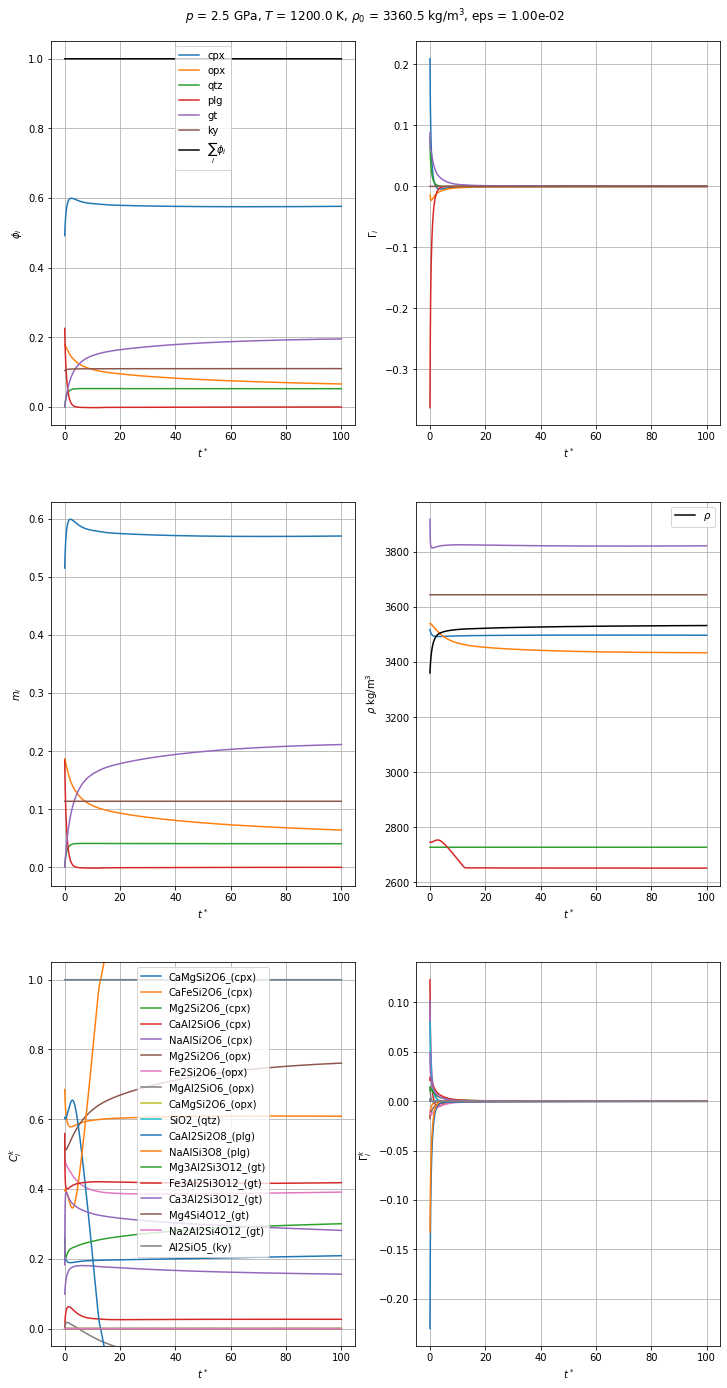

,Clinopyroxene_slb_ph,Orthopyroxene_slb_ph,Quartz_slb_ph,Feldspar_slb_ph,Garnet_slb_ph,Kyanite_slb_ph
Mode (initial),0.515256,0.186778,0.000000,0.184342,0.000000,0.113624
Mode (final),0.570503,0.064111,0.040499,-0.000122,0.211385,0.113624


(<py_eclogitization_agu2_slb_rx.eclogitization_agu2_slb_rx at 0x7fc12046b370>,
 <tcg_slb.phasediagram.base.PDReactiveGridDiagnostics at 0x7fc12d52d370>)

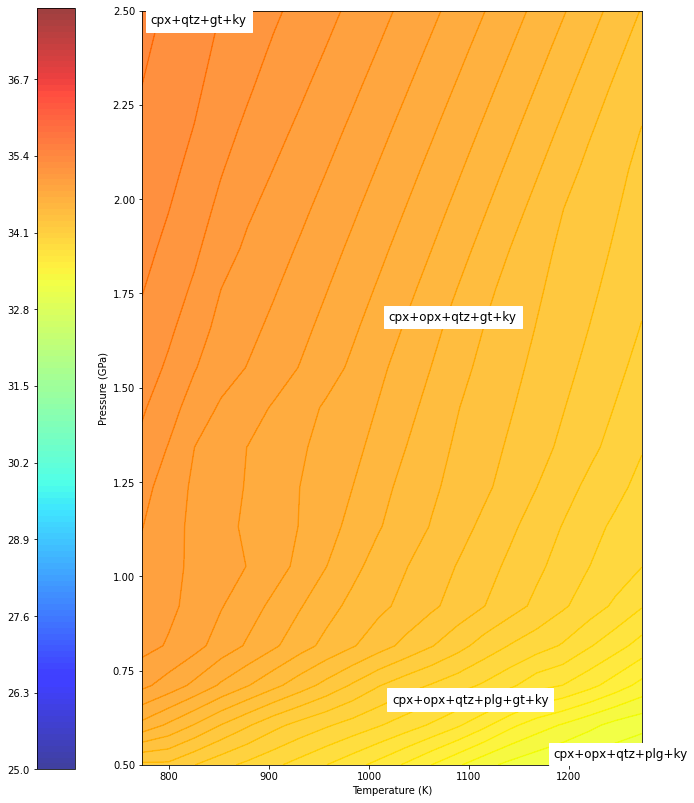

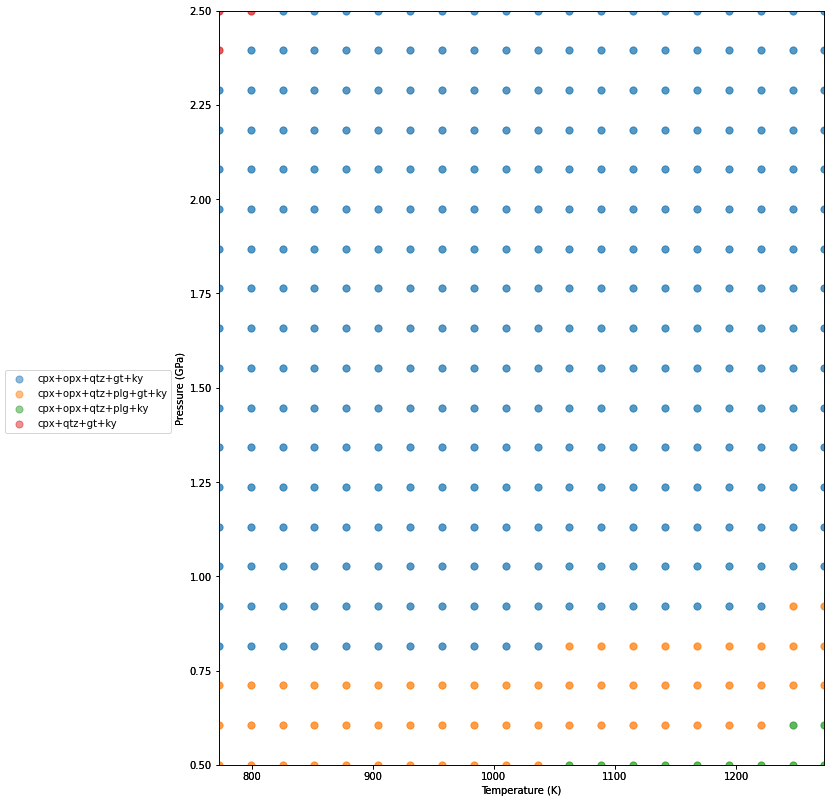

In [3]:
model = EcModel(
    reference,
    "eclogitization_agu2_slb_rx",
    phii0=phii0,
    Xik0=Xik0,
    nP=20,
    nT=20
)

model.run(reload=False,save=True,end_t=1e2)